### Kaggle Graduate Admissions DataSet ###

source: [here](https://www.kaggle.com/mohansacharya/graduate-admissions/home)

### Context ###
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

### Content ###
The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are:
 1. GRE Scores ( out of 340 )
 2. TOEFL Scores ( out of 120 )
 3. University Rating ( out of 5 )
 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
 5. Undergraduate GPA ( out of 10 )
 6. Research Experience ( either 0 or 1 )
 7. Chance of Admit ( ranging from 0 to 1 )

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random_state=42

In [22]:
admission_predict_dataset = pd.read_csv('data/Admission_Predict.csv')
admission_pred_ver_dataset = pd.read_csv('data/Admission_Predict_Ver1.1.csv')

In [23]:
Y = admission_predict_dataset['Chance of Admit ']
X = admission_predict_dataset.drop('Chance of Admit ',axis=1)

### Basic Analysis of X ###

In [24]:
print("Characteristics")
print("Matrix X shape is: {}".format(X.shape))
print("Matrix X sample data are: ")
X.head(5)

Characteristics
Matrix X shape is: (400, 8)
Matrix X sample data are: 


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [44]:
print("X characteristics")
X.describe()

X characteristics


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


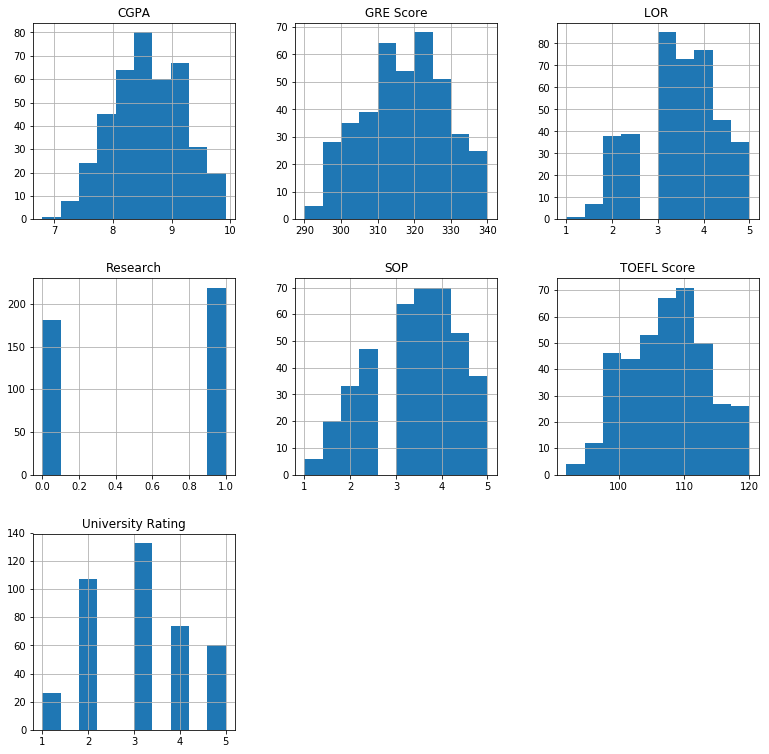

In [26]:
hist=X.drop('Serial No.',axis=1).hist(figsize=(13,13))

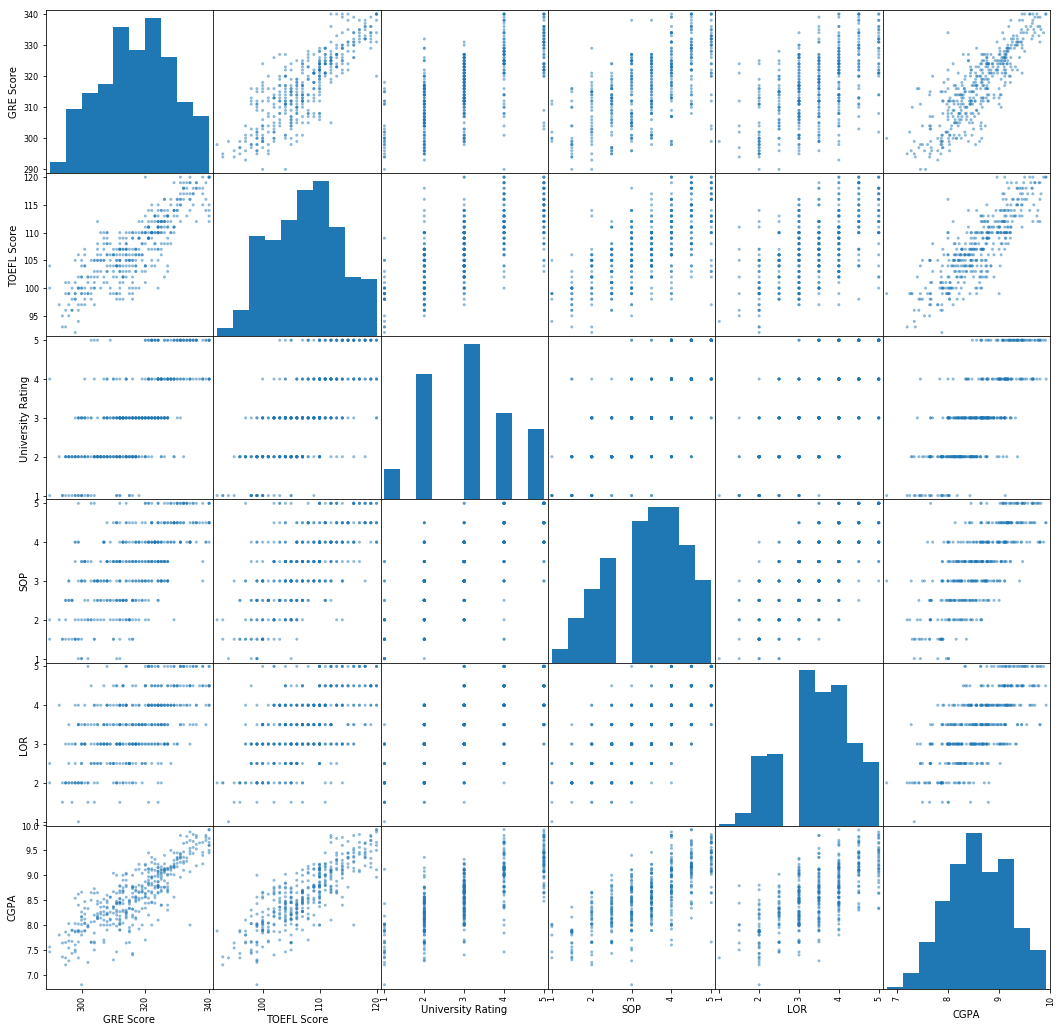

In [27]:
corr = pd.plotting.scatter_matrix(X.drop(['Serial No.','Research'],axis=1),figsize=(18,18))
plt.show()

### Basic Analysis for Y ###

In [28]:
print("Output Characteristics")
print("Matrix Y shape is: {}".format(Y.shape))
print("Matrix Y sample data are: ")

Output Characteristics
Matrix Y shape is: (400,)
Matrix Y sample data are: 


In [29]:
YDescription = Y.describe()
YDescription

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

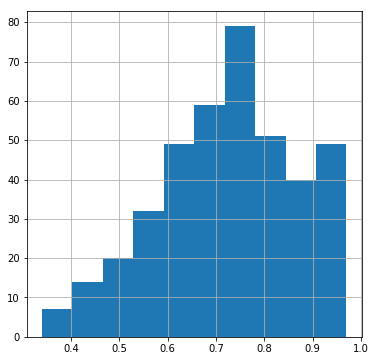

In [30]:
histY= Y.hist(figsize=(6,6))

### PCA Classification ###

In [31]:
from sklearn.decomposition import PCA
def PCA_Analysis(df):
    pca = PCA(n_components=2)
    return pca.fit_transform(df)

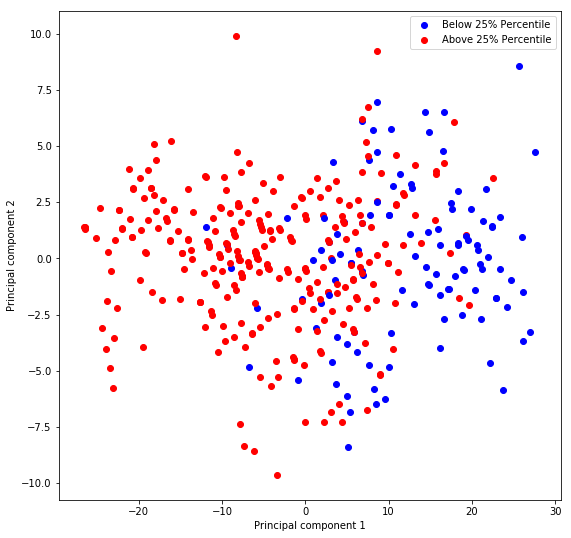

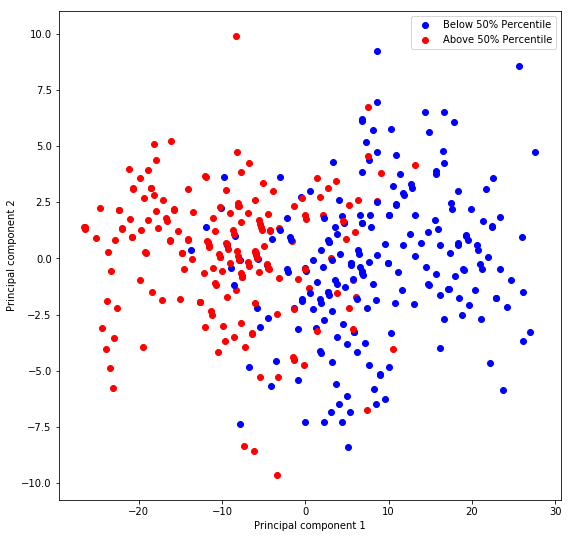

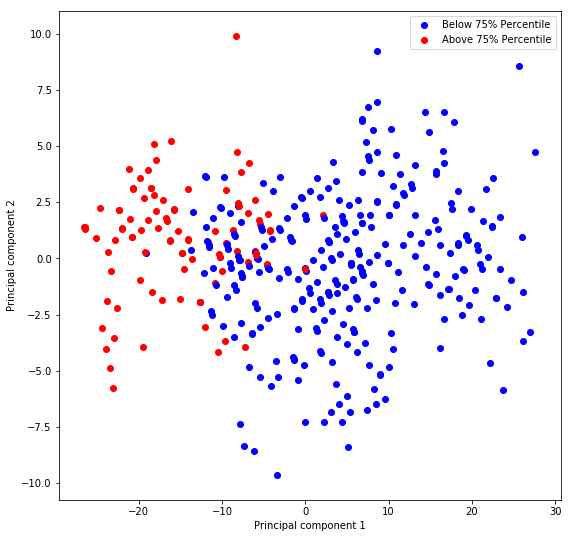

In [32]:
X_PCA = X.drop(['Serial No.','Research'],axis=1)

def percentile_analysis(percentile):
    Y_Perc = [1 if item > np.percentile(Y, percentile) else 0 for item in Y]
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(1, 1, 1)

    for x,y in zip(PCA_Analysis(X_PCA),Y_Perc):
        if y > np.percentile(Y, 25):
            red_items = ax.scatter(x[0], x[1],c="red",label ="Above {}% Percentile".format(percentile))
        else:
            blue_items = ax.scatter(x[0], x[1],c="blue",label ="Below {}% Percentile".format(percentile))

    plt.ylabel('Principal component 2')
    plt.xlabel("Principal component 1")
    plt.legend(handles=[blue_items, red_items])
    plt.show()

percentile_analysis(25)
percentile_analysis(50)
percentile_analysis(75)


### Regression Models ####

### Data Preproccessing ###
1. Scale down so all features have values of similar scale
2. Shuffle data to introduce some randomness
3. Split data to train and test set

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def Shuffle_Split(X,Y):
    X_shuffled, Y_shuffled = shuffle(X, Y, random_state=random_state)
    return train_test_split(X_shuffled, Y_shuffled, test_size=0.20, random_state=random_state)

def Scale_Shuffle_Split(X,Y):
    scaler = StandardScaler()
    X_t_sc = scaler.fit_transform(X.astype(float))
    return Shuffle_Split(X_t_sc,Y)    

In [96]:
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_absolute_error, r2_score

def run_all_models(X_train,X_test,y_train,y_test):
    print('='.join(str() for ii in range(0,90)))
    def evaluateBasicModel(model,model_name):
        model.fit(X_train,y_train)
        # Make predictions using the testing set
        y_pred = model.predict(X_test)
        # The mean absolute error
        mean_abs_error = mean_absolute_error(y_test, y_pred)
        r2_scor = r2_score(y_test, y_pred)
        sprint("Name: %s, Mean absolute error: %.4f R2 score: %.4f" % (model_name,mean_abs_error,r2_scor))
        return mean_abs_error, r2_scor
    
    # KNN
    neigh = KNeighborsRegressor(n_neighbors=3)
    # Random Forest
    RF = RandomForestRegressor(max_depth=10, random_state=random_state)
    # Linear regression
    regr = linear_model.LinearRegression()
    # simple NN
    mlp = MLPRegressor(hidden_layer_sizes=(10, ), activation = 'logistic')
    # Gaussian Process
    gpr = GaussianProcessRegressor(random_state=random_state)
                                   
    evaluateBasicModel(neigh,"KNN Regression")
    evaluateBasicModel(RF,"Random Forest Regression")
    evaluateBasicModel(regr,"Linear Regression")
    evaluateBasicModel(mlp,"NN Regression")
    evaluateBasicModel(gpr, "Gaussian Proccess")
    print('='.join(str() for ii in range(0,90)))

In [98]:
run_all_models(*Scale_Shuffle_Split(X.drop(['Serial No.','Research'],axis=1),Y))
run_all_models(*Scale_Shuffle_Split(X.drop(['Serial No.'],axis=1),Y))

Name: KNN Regression, Mean absolute error: 0.0433 R2 score: 0.7891
Name: Random Forest Regression, Mean absolute error: 0.0450 R2 score: 0.7804
Name: Linear Regression, Mean absolute error: 0.0369 R2 score: 0.8639
Name: NN Regression, Mean absolute error: 0.0487 R2 score: 0.7949
Name: Gaussian Proccess, Mean absolute error: 0.1146 R2 score: -0.4483
Name: KNN Regression, Mean absolute error: 0.0471 R2 score: 0.7659
Name: Random Forest Regression, Mean absolute error: 0.0440 R2 score: 0.7947
Name: Linear Regression, Mean absolute error: 0.0363 R2 score: 0.8649
Name: NN Regression, Mean absolute error: 0.0540 R2 score: 0.7529
Name: Gaussian Proccess, Mean absolute error: 0.1120 R2 score: -0.5028


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
